In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from stk_pred_utils import * 

path='QuandlWikiStocks2012-2018'



Using TensorFlow backend.


In [4]:
cats=True
class_names = ['-','0','+']
intervals=[-1000,-0.02,0.02,1000]
cat_labels=[0,1,2]

cats=True
class_names = ['---','--','-','0','+','++','+++']
intervals=[-1000,-0.02,-0.01,-.003,0.003,0.01,0.02,1000]
cat_labels=[0,1,2,3,4,5,6]


In [17]:
stk=pd.read_csv(path + '/__AGGREGATE_2012-01-01_2018-01-01.csv', index_col=0)
stk[stk.columns[:-1]]=stk[stk.columns[:-1]].where(stk[stk.columns[:-1]]<4,0)

/Users/MD/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
stk.head()

,range,ret_cls,ret_opn,ret_vol,Y,stk_id
0,0.024190,-0.001332,-0.001337,-0.473075,0.011556,0
1,0.025556,0.011556,-0.006472,0.395912,-0.003954,0
2,0.034710,-0.003954,0.019766,-0.408894,0.013013,0
3,0.021835,0.013013,0.003965,-0.091743,-0.003919,0
4,0.022090,-0.003919,0.022817,0.725253,0.005027,0


In [19]:
stk.columns[:-1]

Index(['range', 'ret_cls', 'ret_opn', 'ret_vol', 'Y'], dtype='object')

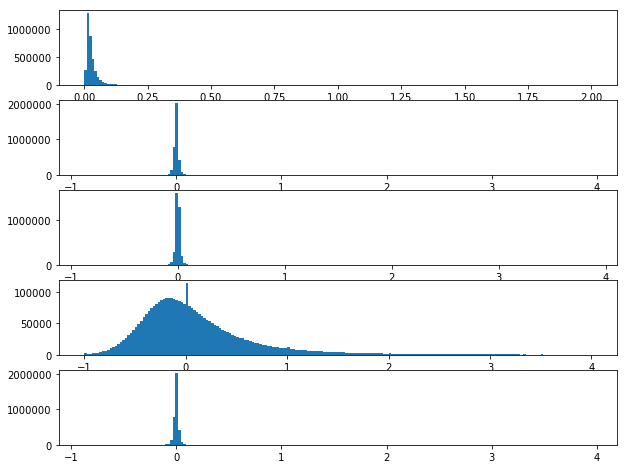

In [7]:
fig, ax = plt.subplots(5,1,figsize=(10, 8))
idx=0

for col in stk.columns[:-1]:
    ax[idx].hist(stk[col],bins=200)
    #ax[idx].hist(pd.cut(stk.Y,bins=intervals,labels=cat_labels))
    idx+=1

In [36]:
import os

idx=0
for root, dirs, files in os.walk("./" + path):  
    for filename in files[:50]:
        print(filename)
        stk=pd.read_csv(path+ '/' + filename)
        if len(stk)>0:
            stk_feat, stk_feat_scld = gen_feats(stk, idx)
            X, Y = gen_model_data(stk_feat, window=20, cats=True)
            if idx==0:
                X_big=X.copy()
                Y_big=Y.copy()
                stk_feat_full=stk_feat.copy()
            else:
                X_big=np.append(X_big,X,axis=0)
                Y_big=Y_big.append(Y, ignore_index=True)
                stk_feat_full=stk_feat_full.append(stk_feat, ignore_index=True)
        idx+=1
        print('Stock Nr '+str(idx)+': '+filename)
print(X_big.shape)

WABC_2012-01-01_2018-01-01.csv
Stock Nr 1: WABC_2012-01-01_2018-01-01.csv
MACK_2012-01-01_2018-01-01.csv
Stock Nr 2: MACK_2012-01-01_2018-01-01.csv
WTS_2012-01-01_2018-01-01.csv
Stock Nr 3: WTS_2012-01-01_2018-01-01.csv
COHR_2012-01-01_2018-01-01.csv
Stock Nr 4: COHR_2012-01-01_2018-01-01.csv
MCD_2012-01-01_2018-01-01.csv
Stock Nr 5: MCD_2012-01-01_2018-01-01.csv
AE_2012-01-01_2018-01-01.csv
Stock Nr 6: AE_2012-01-01_2018-01-01.csv
SFNC_2012-01-01_2018-01-01.csv
Stock Nr 7: SFNC_2012-01-01_2018-01-01.csv
COUP_2012-01-01_2018-01-01.csv
Stock Nr 8: COUP_2012-01-01_2018-01-01.csv
NMFC_2012-01-01_2018-01-01.csv
Stock Nr 9: NMFC_2012-01-01_2018-01-01.csv
IBP_2012-01-01_2018-01-01.csv
Stock Nr 10: IBP_2012-01-01_2018-01-01.csv
ASTE_2012-01-01_2018-01-01.csv
Stock Nr 11: ASTE_2012-01-01_2018-01-01.csv
HRTX_2012-01-01_2018-01-01.csv
Stock Nr 12: HRTX_2012-01-01_2018-01-01.csv
THRM_2012-01-01_2018-01-01.csv
Stock Nr 13: THRM_2012-01-01_2018-01-01.csv
CFG-D_2012-01-01_2018-01-01.csv
Stock Nr 14:

New sample total size 282
Iter 0, len:282, time: 0:00:01.460143
New sample total size 1148


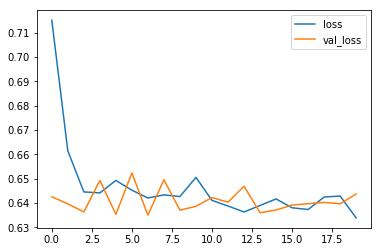

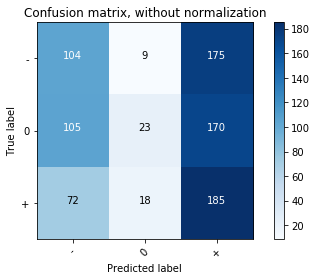

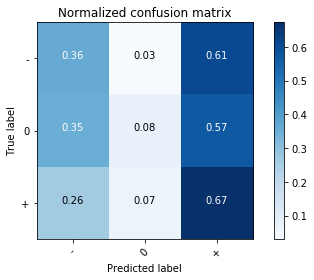

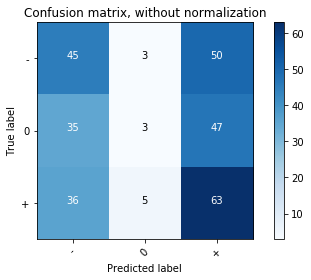

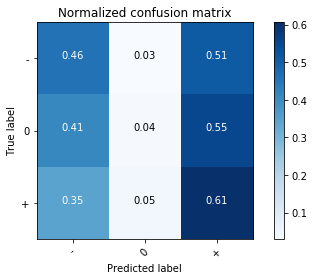

Test precision[0.38790000000000002, 0.39379999999999998]
Train precision[0.37009999999999998, 0.34910000000000002]
Iter 1, len:1148, time: 0:01:01.862616
New sample total size 354
Iter 2, len:354, time: 0:00:01.517894
New sample total size 480
Iter 3, len:480, time: 0:00:01.507664
New sample total size 72
Iter 4, len:72, time: 0:00:01.474783
New sample total size 827


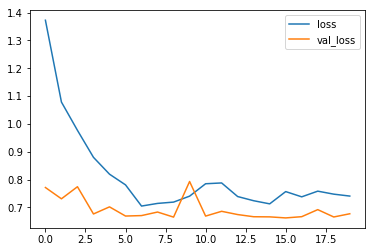

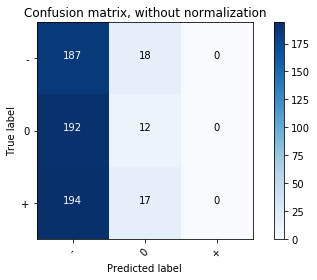

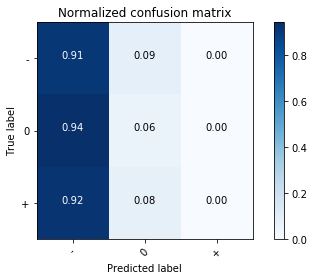

/Users/MD/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


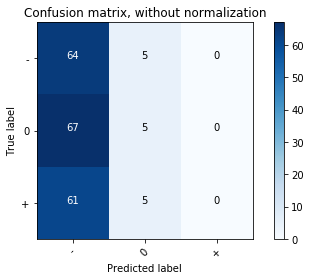

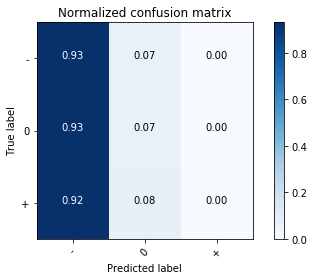

Test precision[0.33329999999999999, 0.0]
Train precision[0.32640000000000002, 0.0]
Iter 5, len:827, time: 0:00:58.647752
New sample total size 339
Iter 6, len:339, time: 0:00:01.496131
New sample total size 119
Iter 7, len:119, time: 0:00:00.294957
New sample total size 114
Iter 8, len:114, time: 0:00:01.507720
New sample total size 410
Iter 9, len:410, time: 0:00:00.970715
New sample total size 506


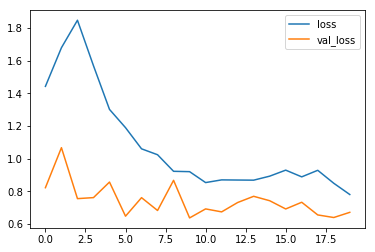

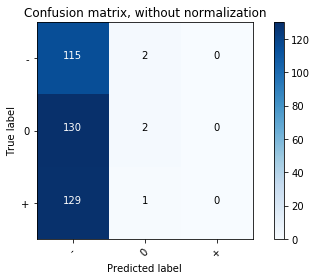

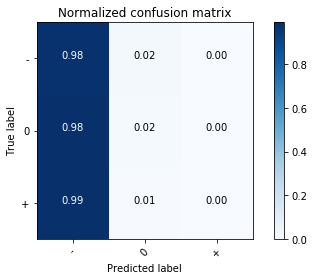

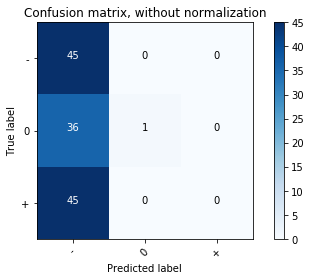

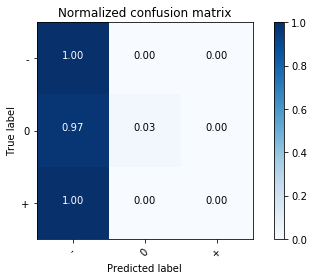

Test precision[0.35709999999999997, 0.0]
Train precision[0.3075, 0.0]
Iter 10, len:506, time: 0:00:56.387762
New sample total size 1176


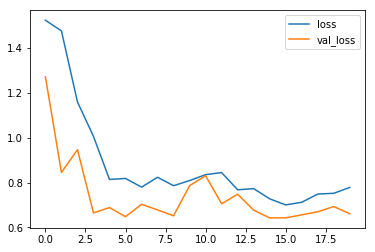

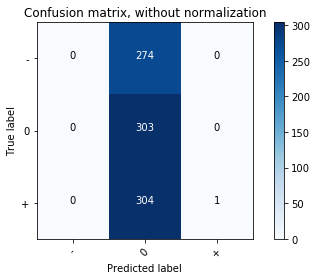

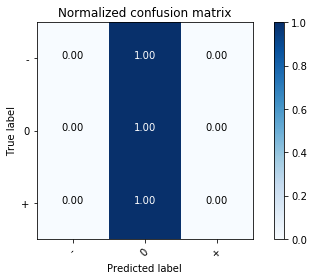

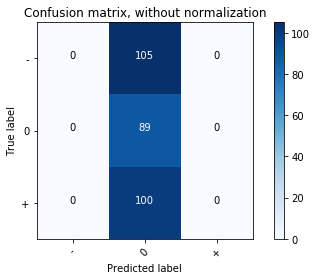

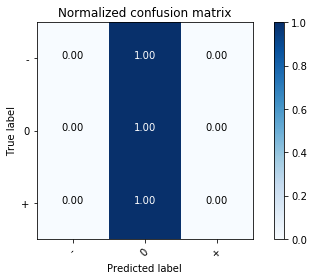

Test precision[0.0, 0.0]
Train precision[0.0, 1.0]
Iter 11, len:1176, time: 0:01:02.659280
New sample total size 675


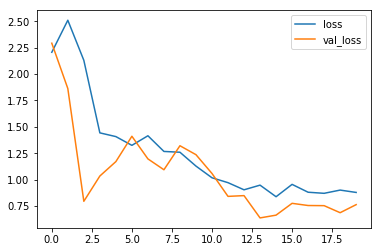

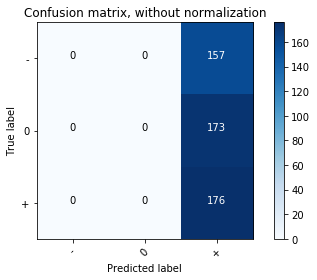

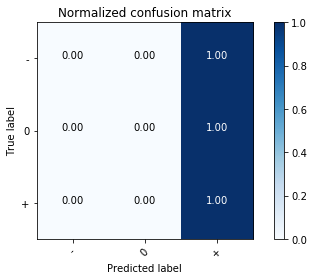

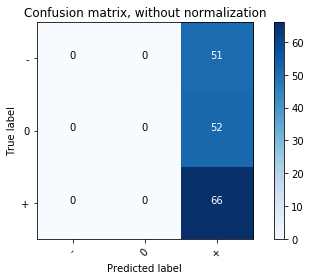

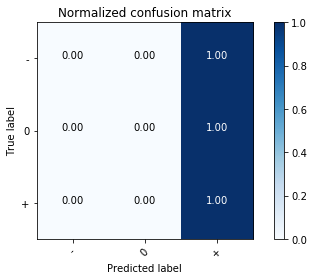

Test precision[0.0, 0.39050000000000001]
Train precision[0.0, 0.3478]
Iter 12, len:675, time: 0:00:58.344267
New sample total size 231
Iter 13, len:231, time: 0:00:00.820493
New sample total size 432
Iter 14, len:432, time: 0:00:01.418439
New sample total size 180
Iter 15, len:180, time: 0:00:01.310338
New sample total size 932


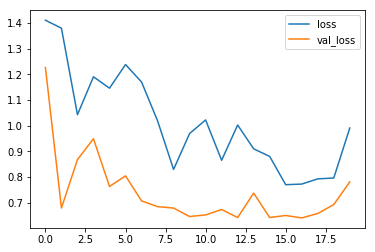

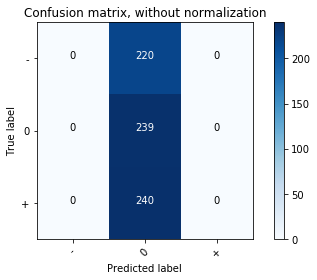

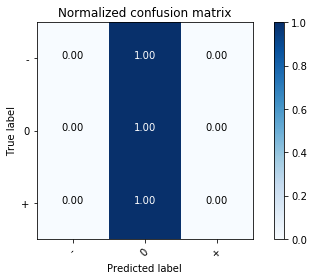

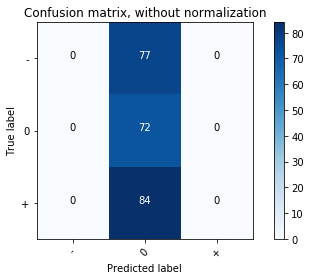

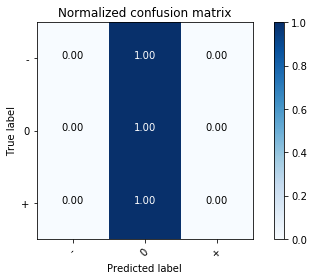

Test precision[0.0, 0.0]
Train precision[0.0, 0.0]
Iter 16, len:932, time: 0:01:03.567325
New sample total size 171
Iter 17, len:171, time: 0:00:01.493593
New sample total size 243
Iter 18, len:243, time: 0:00:01.578143
New sample total size 75
Iter 19, len:75, time: 0:00:01.763056
New sample total size 834


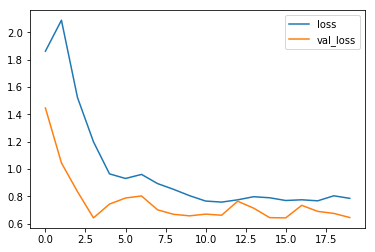

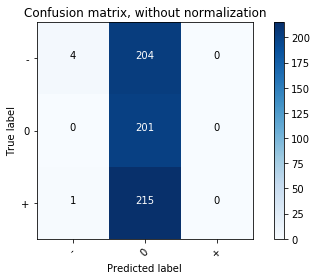

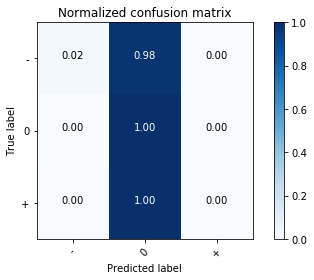

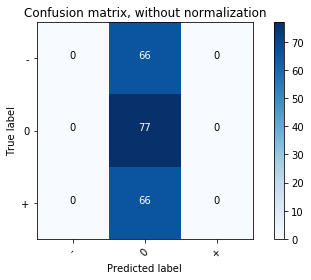

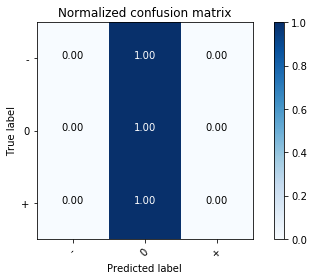

Test precision[0.0, 0.0]
Train precision[0.80000000000000004, 0.0]
Iter 20, len:834, time: 0:01:03.494020
New sample total size 531


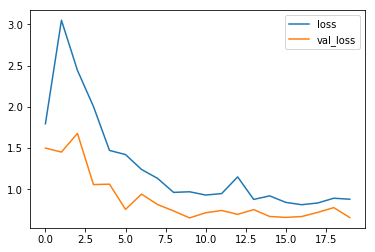

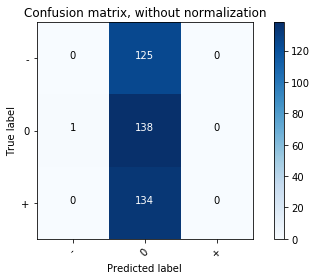

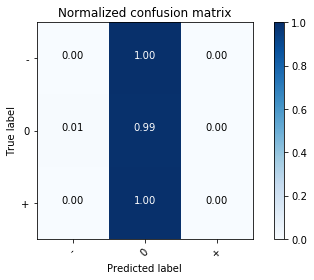

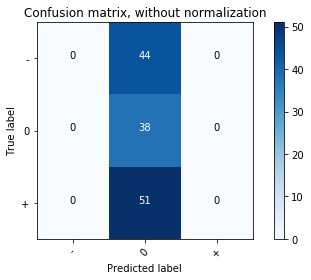

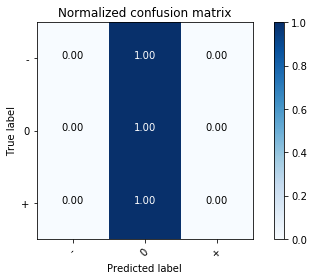

Test precision[0.0, 0.0]
Train precision[0.0, 0.0]
Iter 21, len:531, time: 0:00:57.353290
New sample total size 320
Iter 22, len:320, time: 0:00:01.391716
New sample total size 246
Iter 23, len:246, time: 0:00:01.513686
New sample total size 330
Iter 24, len:330, time: 0:00:01.434294
New sample total size 734


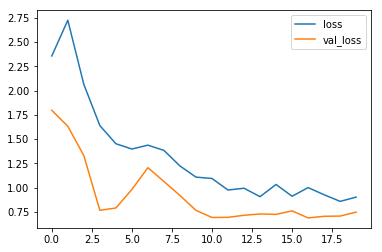

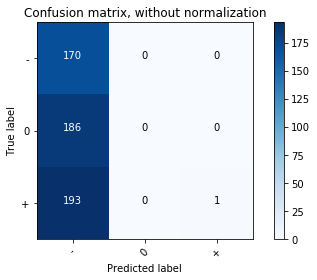

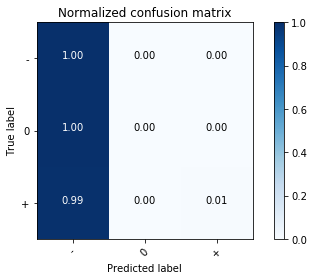

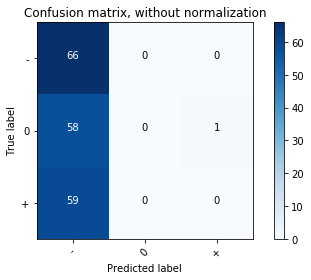

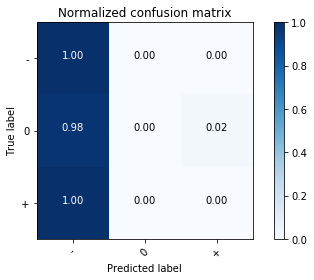

Test precision[0.36070000000000002, 0.0]
Train precision[0.30969999999999998, 1.0]
Iter 25, len:734, time: 0:00:59.625221
New sample total size 158
Iter 26, len:158, time: 0:00:01.490047
New sample total size 414
Iter 27, len:414, time: 0:00:01.433628
New sample total size 537


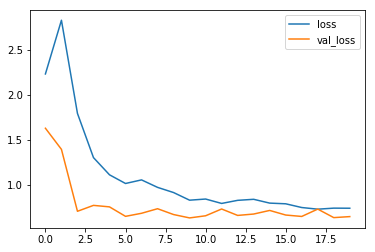

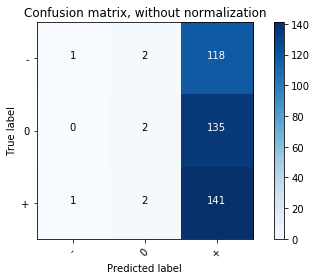

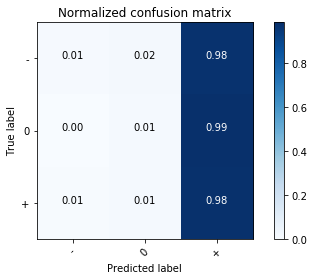

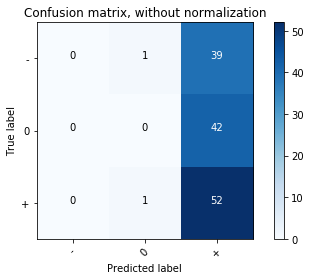

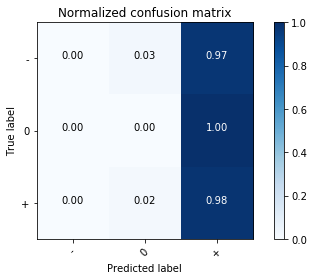

Test precision[0.0, 0.39100000000000001]
Train precision[0.5, 0.3579]
Iter 28, len:537, time: 0:00:57.603805
New sample total size 912


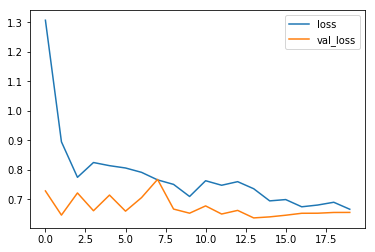

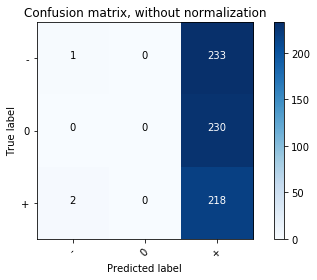

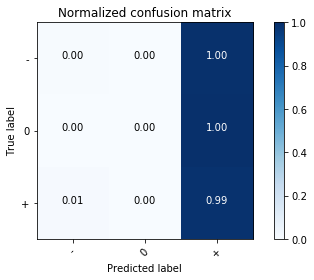

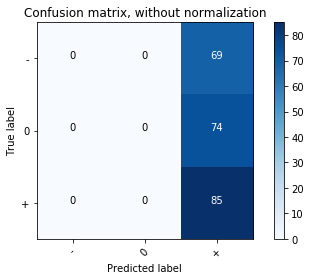

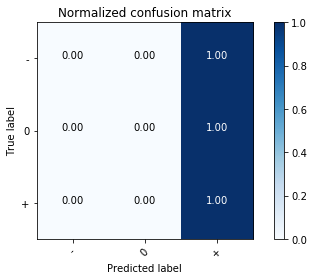

Test precision[0.0, 0.37280000000000002]
Train precision[0.33329999999999999, 0.3201]
Iter 29, len:912, time: 0:01:01.935175
New sample total size 482
Iter 30, len:482, time: 0:00:01.494684
New sample total size 807


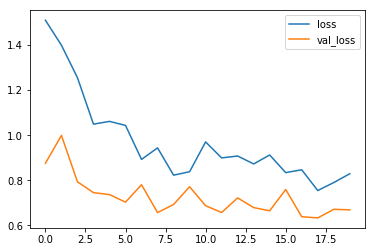

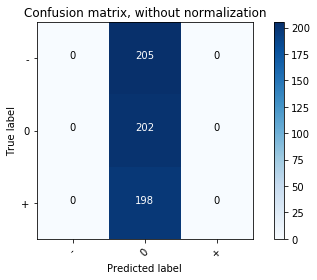

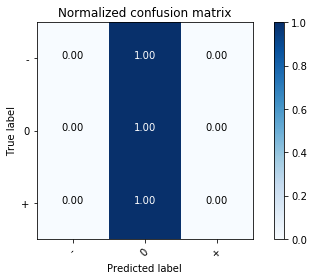

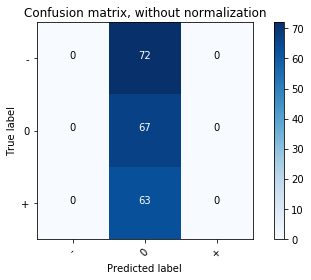

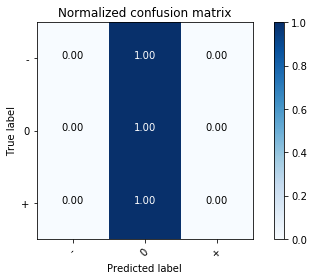

Test precision[0.0, 0.0]
Train precision[0.0, 0.0]
Iter 31, len:807, time: 0:01:01.638267
New sample total size 378
Iter 32, len:378, time: 0:00:01.428069
New sample total size 326
Iter 33, len:326, time: 0:00:01.405136
New sample total size 344
Iter 34, len:344, time: 0:00:00.948614
New sample total size 257
Iter 35, len:257, time: 0:00:01.403710
New sample total size 1103


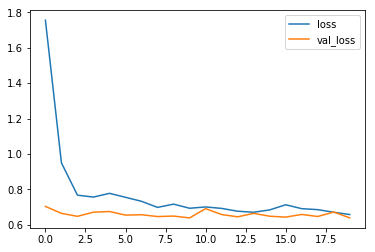

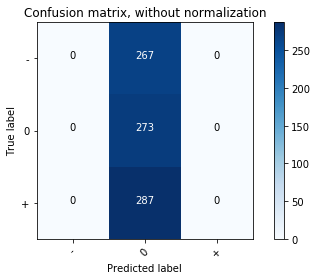

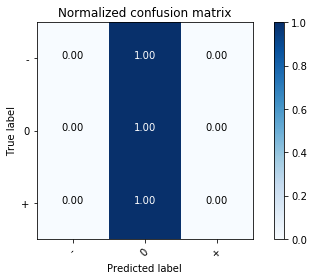

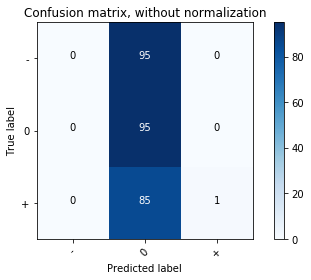

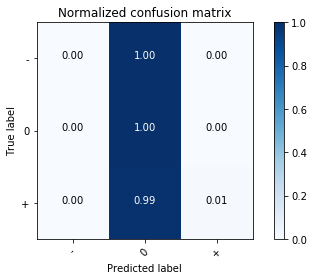

Test precision[0.0, 1.0]
Train precision[0.0, 0.0]
Iter 36, len:1103, time: 0:01:03.907074
New sample total size 137
Iter 37, len:137, time: 0:00:01.511375
New sample total size 795


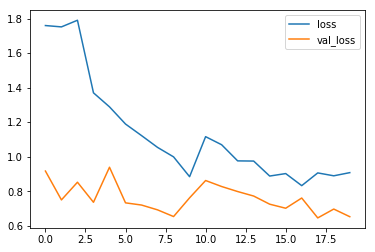

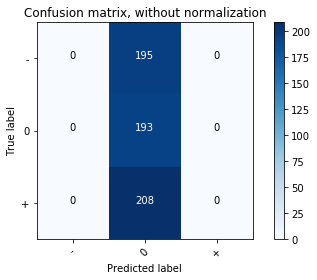

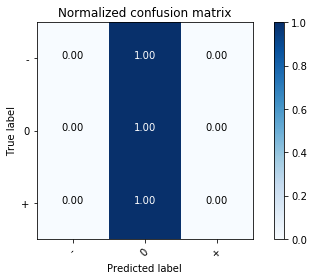

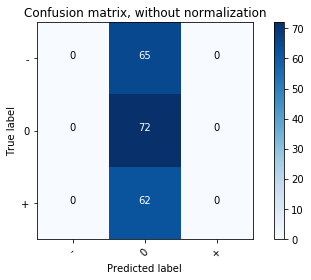

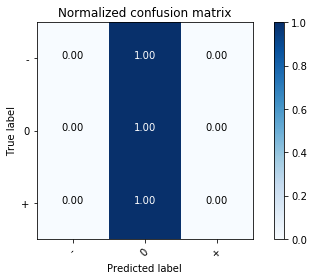

Test precision[0.0, 0.0]
Train precision[0.0, 0.0]
Iter 38, len:795, time: 0:01:01.571744
New sample total size 480
Iter 39, len:480, time: 0:00:01.475986
New sample total size 291
Iter 40, len:291, time: 0:00:01.471313
New sample total size 323
Iter 41, len:323, time: 0:00:01.009092
New sample total size 641


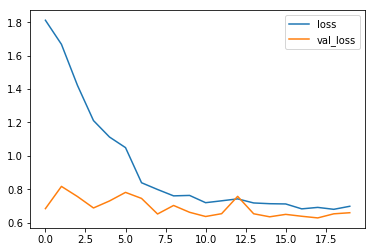

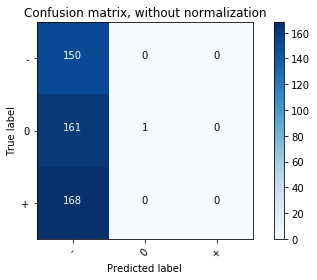

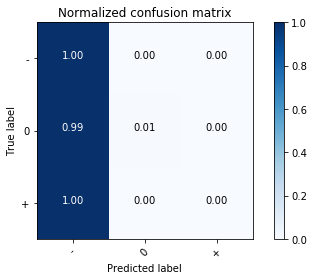

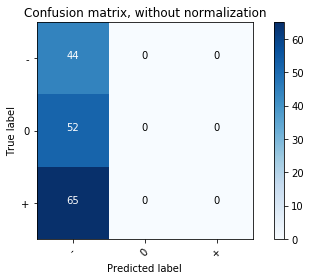

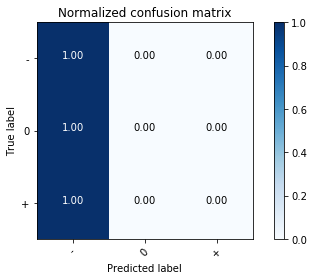

Test precision[0.27329999999999999, 0.0]
Train precision[0.31319999999999998, 0.0]
Iter 42, len:641, time: 0:00:59.584560
New sample total size 1193


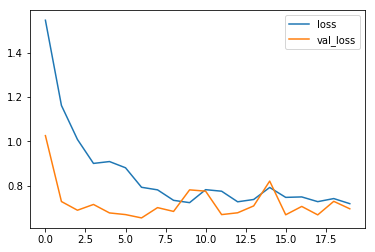

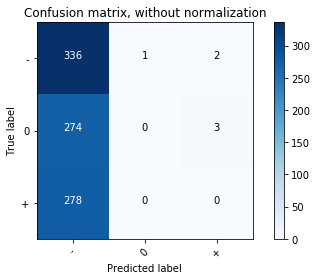

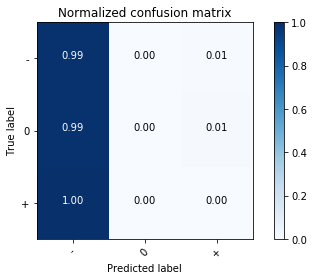

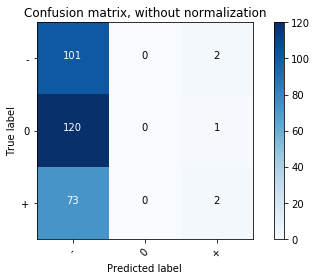

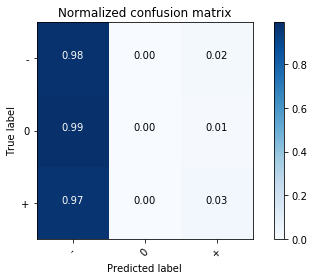

Test precision[0.34350000000000003, 0.40000000000000002]
Train precision[0.37840000000000001, 0.0]
Iter 43, len:1193, time: 0:01:06.323959
New sample total size 579


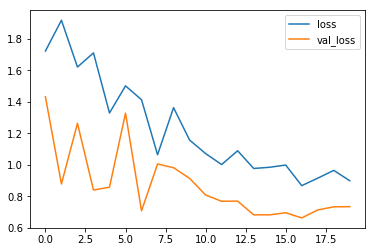

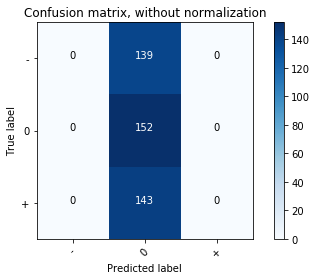

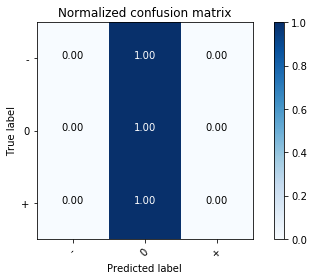

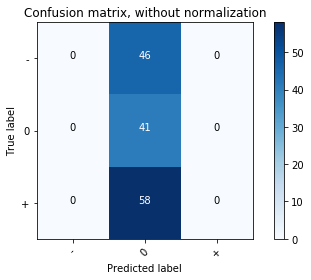

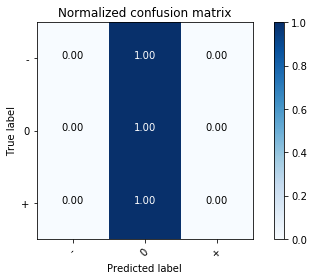

Test precision[0.0, 0.0]
Train precision[0.0, 0.0]
Iter 44, len:579, time: 0:00:59.817266
New sample total size 827


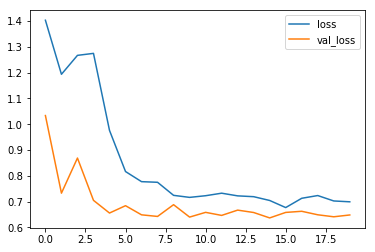

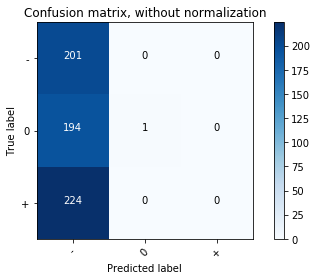

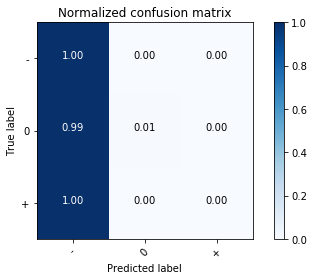

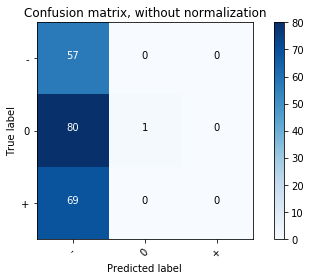

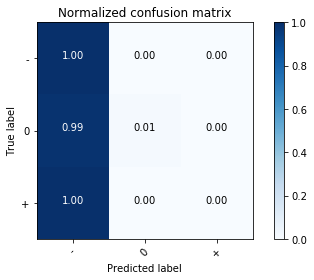

Test precision[0.2767, 0.0]
Train precision[0.32469999999999999, 0.0]
Iter 45, len:827, time: 0:01:04.494741
New sample total size 470
Iter 46, len:470, time: 0:00:01.432068
New sample total size 561


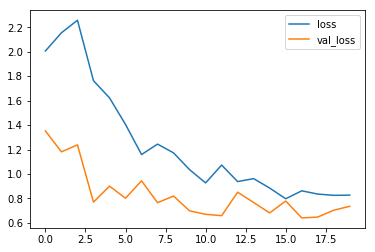

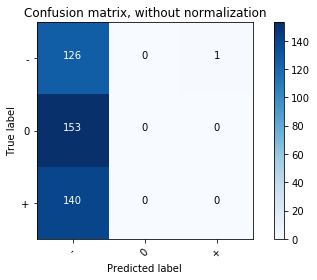

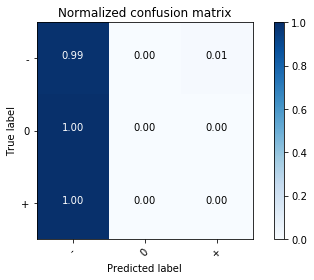

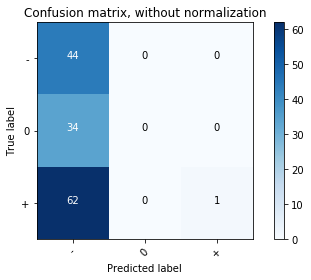

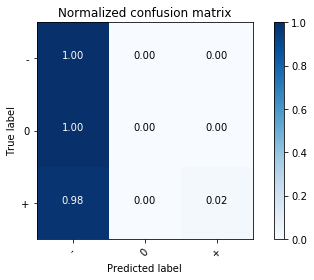

Test precision[0.31430000000000002, 1.0]
Train precision[0.30070000000000002, 0.0]
Iter 47, len:561, time: 0:01:01.650088
New sample total size 527


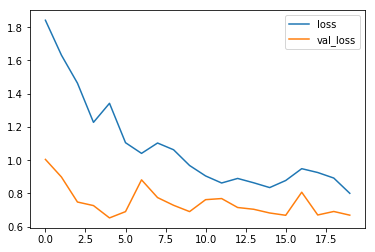

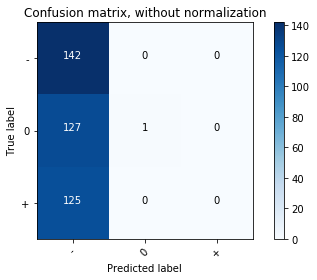

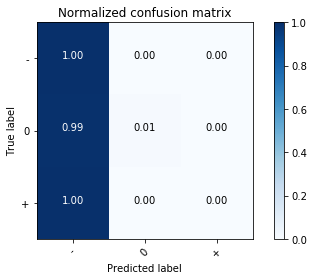

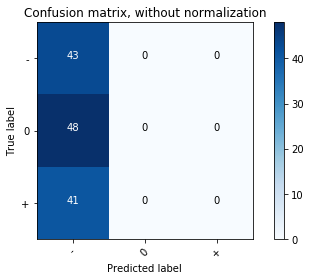

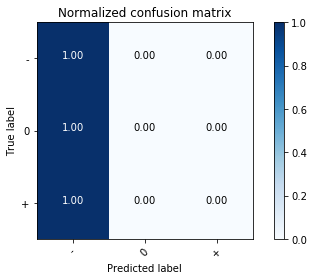

Test precision[0.32579999999999998, 0.0]
Train precision[0.3604, 0.0]
Iter 48, len:527, time: 0:01:00.197281
New sample total size 407
Iter 49, len:407, time: 0:00:01.501720


In [206]:
import datetime

neurons=64
batch=50
epochs=50
dropout=0.8

iiz=0
for iix in range(50):#stk_feat_full['stk_id'].max()):
    t0=datetime.datetime.now()
    slice_iter=stk_feat_full[stk_feat_full['stk_id']==iix]
    X, Y = gen_model_data(slice_iter, window=20, cats=True)
    Y = Y.reset_index(drop=True)
    X, Y = gen_downsmpl_data(X,Y)
        
    if len(X)>500:
        X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

        nn_model_mkt = build_model(X_train, output_size=len(cat_labels), 
                                   neurons = neurons, dropout=dropout,
                                   loss='binary_crossentropy',activ_func='sigmoid')
        # model output is next price normalised to 10th previous closing price
        # train model on data
        #  INSAMPLE!!!!
        nn_history = nn_model_mkt.fit(X, Y, 
                                      epochs=epochs, batch_size=batch, 
                                      verbose=0, validation_split=0.3, shuffle=True
                                      )
        res_params=nn_model_mkt.layers[2].get_weights()[0]
        # plot some data
        plt.plot(nn_history.history['loss'], label='loss')
        plt.plot(nn_history.history['val_loss'], label='val_loss')
        plt.legend()
        plt.show()
        
        y_cat_tr, y_pred_cat_tr = confusion_calc(X_train,y_train,nn_model_mkt,thresholds=False)
        y_cat_ts, y_pred_cat_ts = confusion_calc(X_test,y_test,nn_model_mkt,thresholds=False)
        prec_tr=cm_analysis(y_cat_tr, y_pred_cat_tr,class_names,plot=True)
        prec_ts=cm_analysis(y_cat_ts, y_pred_cat_ts, class_names,plot=True)
        print('Test precision' + str(prec_ts))
        print('Train precision' + str(prec_tr))
        if iiz>0:
            res_params_full=np.append(res_params_full,[res_params],axis=0) 
            prec_full=np.append(prec_full,[[prec_tr,prec_ts]],axis=0) 
            memb=np.append(memb,[iix],axis=0)
        else:
            res_params_full=[res_params]
            prec_full=[[prec_tr,prec_ts]]
            memb=[iix]
        iiz+=1
    print('Iter ' + str(iix) + ', len:' + str(len(X)) + ', time: '+ str(datetime.datetime.now()-t0))
        

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
res_pca = pca.fit_transform(res_params_full[:,:,2])

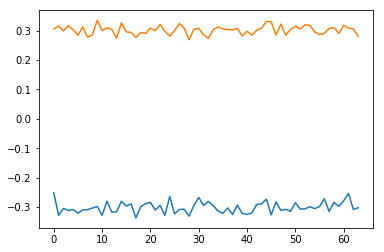

In [583]:
plt.plot(res_params_full[:,:,2].min(axis=0))
plt.plot(res_params_full[:,:,2].max(axis=0))

In [574]:
pca.explained_variance_ratio_

array([ 0.05,  0.05,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.03,
        0.03,  0.03,  0.03,  0.03,  0.03,  0.03,  0.03,  0.02,  0.02,
        0.02,  0.02], dtype=float32)

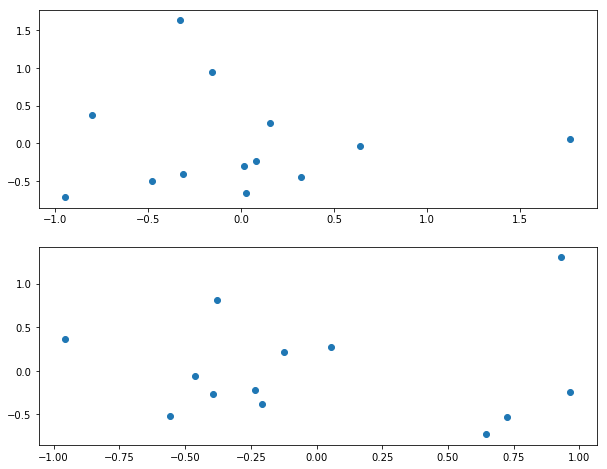

In [63]:
fig, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].scatter(res_pca[:,0],res_pca[:,1])
ax[1].scatter(res_pca[:,2],res_pca[:,3])

In [31]:
stk=pd.read_csv(path+ '/' + files[1])
stk_feat, stk_scld = gen_feats(stk,1)
stk_feat.head()

,range,ret_cls,ret_opn,ret_vol,Y,stk_id
0,0.105960,0.024834,-0.053543,-0.834952,-0.030695,1
1,0.061389,-0.030695,0.053245,-0.543137,0.013333,1
2,0.076667,0.013333,-0.039494,-0.000351,-0.011513,1
3,0.026316,-0.011513,-0.011513,-0.826896,0.008319,1
4,0.008486,0.008319,0.006822,-0.077079,0.079208,1


In [8]:
from ipywidgets import FloatProgress
from IPython.display import display

In [21]:
#stk_feat, stk_feat_scld = gen_feats(stk, idx)

for idx in range(stk['stk_id'].max()):
    X, Y = gen_model_data(stk[stk['stk_id']==idx], 20, intervals, cat_labels, cats=True)
    if len(Y)>0:
        if idx==0:
            X_big=X.copy()
            Y_big=Y.copy()
        else:
            X_big=np.append(X_big,X,axis=0)
            Y_big=Y_big.append(Y, ignore_index=True)
    f.value = 100*idx/stk['stk_id'].max()


#X_smpl, Y_smpl = gen_downsmpl_data(X_big,Y_big)
#X_train, X_test, y_train, y_test = train_test_split(X_smpl,Y_smpl,random_state=0)

In [9]:
f = FloatProgress(min=0, max=100)
display(f)

In [59]:
neurons=40
batch=500
epochs=600
dropout=0.5

# initialise model architecture
if cats == True:
    nn_model_mkt = build_model(X_big, output_size=len(cat_labels), 
                               neurons = neurons, dropout=dropout,
                               loss='binary_crossentropy',activ_func='sigmoid')
else:
    nn_model_mkt = build_model(X_big, output_size=1, neurons = neurons)

# model output is next price normalised to 10th previous closing price
# train model on data
nn_history = nn_model_mkt.fit(X_big[:20000], Y_big[:20000], 
                              epochs=epochs, batch_size=batch, 
                              verbose=1, shuffle=True, validation_split=0.3)

# plot some data
plt.plot(nn_history.history['loss'], label='loss')
plt.plot(nn_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Train on 14000 samples, validate on 6000 samples
Epoch 1/600
14000/14000 [==============================] - 28s 2ms/step - loss: 0.4561 - val_loss: 0.4132
Epoch 2/600
14000/14000 [==============================] - 13s 894us/step - loss: 0.4148 - val_loss: 0.4124
Epoch 3/600
14000/14000 [==============================] - 13s 897us/step - loss: 0.4127 - val_loss: 0.4138
Epoch 4/600
14000/14000 [==============================] - 13s 896us/step - loss: 0.4110 - val_loss: 0.4130
Epoch 5/600
14000/14000 [==============================] - 13s 896us/step - loss: 0.4108 - val_loss: 0.4137
Epoch 6/600
14000/14000 [==============================] - 13s 932us/step - loss: 0.4103 - val_loss: 0.4136
Epoch 7/600
14000/14000 [==============================] - 13s 897us/step - loss: 0.4099 - val_loss: 0.4143
Epoch 8/600
14000/14000 [==============================] - 13s 894us/step - loss: 0.4095 - val_loss: 0.4137
Epoch 9/600
14000/14000 [==============================] - 13s 897us/step - loss: 0.4093 

Epoch 76/600
14000/14000 [==============================] - 13s 899us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 77/600
14000/14000 [==============================] - 13s 905us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 78/600
14000/14000 [==============================] - 13s 896us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 79/600
14000/14000 [==============================] - 13s 893us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 80/600
14000/14000 [==============================] - 13s 902us/step - loss: 0.4055 - val_loss: 0.4138
Epoch 81/600
14000/14000 [==============================] - 13s 918us/step - loss: 0.4055 - val_loss: 0.4140
Epoch 82/600
14000/14000 [==============================] - 13s 906us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 83/600
14000/14000 [==============================] - 13s 896us/step - loss: 0.4055 - val_loss: 0.4133
Epoch 84/600
14000/14000 [==============================] - 13s 900us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 85/600
14000/

Epoch 151/600
14000/14000 [==============================] - 13s 894us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 152/600
14000/14000 [==============================] - 13s 927us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 153/600
14000/14000 [==============================] - 13s 896us/step - loss: 0.4054 - val_loss: 0.4136
Epoch 154/600
14000/14000 [==============================] - 13s 897us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 155/600
14000/14000 [==============================] - 13s 963us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 156/600
14000/14000 [==============================] - 14s 967us/step - loss: 0.4054 - val_loss: 0.4137
Epoch 157/600
14000/14000 [==============================] - 14s 995us/step - loss: 0.4055 - val_loss: 0.4135
Epoch 158/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4055 - val_loss: 0.4138
Epoch 159/600
14000/14000 [==============================] - 13s 961us/step - loss: 0.4055 - val_loss: 0.4135
Epoch 160/60

14000/14000 [==============================] - 14s 986us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 226/600
14000/14000 [==============================] - 14s 972us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 227/600
14000/14000 [==============================] - 15s 1ms/step - loss: 0.4055 - val_loss: 0.4136
Epoch 228/600
14000/14000 [==============================] - 15s 1ms/step - loss: 0.4054 - val_loss: 0.4135
Epoch 229/600
14000/14000 [==============================] - 14s 969us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 230/600
14000/14000 [==============================] - 16s 1ms/step - loss: 0.4055 - val_loss: 0.4135
Epoch 231/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4055 - val_loss: 0.4137
Epoch 232/600
14000/14000 [==============================] - 14s 993us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 233/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4055 - val_loss: 0.4135
Epoch 234/600
14000/14000 [=======

Epoch 300/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4138
Epoch 301/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4136
Epoch 302/600
14000/14000 [==============================] - 16s 1ms/step - loss: 0.4055 - val_loss: 0.4135
Epoch 303/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4139
Epoch 304/600
14000/14000 [==============================] - 14s 983us/step - loss: 0.4055 - val_loss: 0.4134
Epoch 305/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4137
Epoch 306/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4135
Epoch 307/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4135
Epoch 308/600
14000/14000 [==============================] - 14s 983us/step - loss: 0.4054 - val_loss: 0.4136
Epoch 309/600
14000/1400

Epoch 375/600
14000/14000 [==============================] - 14s 998us/step - loss: 0.4055 - val_loss: 0.4134
Epoch 376/600
14000/14000 [==============================] - 14s 988us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 377/600
14000/14000 [==============================] - 14s 977us/step - loss: 0.4054 - val_loss: 0.4136
Epoch 378/600
14000/14000 [==============================] - 14s 975us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 379/600
14000/14000 [==============================] - 14s 977us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 380/600
14000/14000 [==============================] - 14s 972us/step - loss: 0.4054 - val_loss: 0.4136
Epoch 381/600
14000/14000 [==============================] - 14s 993us/step - loss: 0.4055 - val_loss: 0.4138
Epoch 382/600
14000/14000 [==============================] - 14s 1ms/step - loss: 0.4054 - val_loss: 0.4136
Epoch 383/600
14000/14000 [==============================] - 14s 978us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 384/60

14000/14000 [==============================] - 13s 893us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 450/600
14000/14000 [==============================] - 12s 892us/step - loss: 0.4054 - val_loss: 0.4137
Epoch 451/600
14000/14000 [==============================] - 13s 905us/step - loss: 0.4054 - val_loss: 0.4137
Epoch 452/600
14000/14000 [==============================] - 13s 894us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 453/600
14000/14000 [==============================] - 12s 893us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 454/600
14000/14000 [==============================] - 12s 891us/step - loss: 0.4054 - val_loss: 0.4136
Epoch 455/600
14000/14000 [==============================] - 13s 899us/step - loss: 0.4054 - val_loss: 0.4137
Epoch 456/600
14000/14000 [==============================] - 13s 895us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 457/600
14000/14000 [==============================] - 13s 897us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 458/600
14000/1400

Epoch 524/600
14000/14000 [==============================] - 12s 884us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 525/600
14000/14000 [==============================] - 12s 887us/step - loss: 0.4055 - val_loss: 0.4137
Epoch 526/600
14000/14000 [==============================] - 12s 884us/step - loss: 0.4054 - val_loss: 0.4134
Epoch 527/600
14000/14000 [==============================] - 12s 888us/step - loss: 0.4054 - val_loss: 0.4137
Epoch 528/600
14000/14000 [==============================] - 12s 889us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 529/600
14000/14000 [==============================] - 12s 888us/step - loss: 0.4054 - val_loss: 0.4135
Epoch 530/600
14000/14000 [==============================] - 12s 892us/step - loss: 0.4055 - val_loss: 0.4136
Epoch 531/600
14000/14000 [==============================] - 12s 886us/step - loss: 0.4054 - val_loss: 0.4138
Epoch 532/600
14000/14000 [==============================] - 12s 892us/step - loss: 0.4054 - val_loss: 0.4134
Epoch 533/

KeyboardInterrupt: 

In [60]:
nn_model_mkt.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 20, 40)            7200      
_________________________________________________________________
lstm_51 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_52 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_53 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_54 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_55 (LSTM)               (None, 20, 40)            12960     
_________________________________________________________________
lstm_56 (LSTM)               (None, 20, 40)            12960     
__________

Next steps:

Done: 
- Downsample to match category size
- Run one round of training to all stocks, then cluster and train in clusters
- Model: Expand for deeper LSTM models - no significant improvement with deeper networks

Prioritize:
- Clustering of PCA results and mapping to respective models
- Include additional metrics in and estimate correct number of epochs before loss of generality - 600
- Find a good lambda
- Experiment with architectures: Deeper/GlobalMaxPool/Bidirectional

Further down:
- Set up a first step where you try and train 20 epochs 20 times and save to then train only the best of the first round
- Pipeline: include other economics to train/cluster types
- Pipeline: include intraday data
- Train: Train models with full data
- Realistic: Predict return from market open to market close
- Transform features to normal

In [ ]:
Train on 14000 samples, validate on 6000 samples
Epoch 1/600
14000/14000 [==============================] - 23s 2ms/step - loss: 0.4956 - val_loss: 0.4133

Epoch 270/600
14000/14000 [==============================] - 12s 879us/step - loss: 0.4055 - val_loss: 0.4135


In [ ]:
Train on 2426825 samples, validate on 1040068 samples
Epoch 1/30
2426825/2426825 [==============================] - 2176s 897us/step - loss: 0.4260 - val_loss: 0.3977
Epoch 2/30
2426825/2426825 [==============================] - 2161s 890us/step - loss: 0.3997 - val_loss: 0.3964
Epoch 3/30
2426825/2426825 [==============================] - 2406s 991us/step - loss: 0.3992 - val_loss: 0.3963
Epoch 4/30
2426825/2426825 [==============================] - 2249s 927us/step - loss: 0.3990 - val_loss: 0.3961
Epoch 5/30
2426825/2426825 [==============================] - 2233s 920us/step - loss: 0.3990 - val_loss: 0.3963
Epoch 6/30
2426825/2426825 [==============================] - 2155s 888us/step - loss: 0.3989 - val_loss: 0.3959
Epoch 7/30
2426825/2426825 [==============================] - 2239s 923us/step - loss: 0.3987 - val_loss: 0.3960
Epoch 8/30
2426825/2426825 [==============================] - 2415s 995us/step - loss: 0.3986 - val_loss: 0.3959
Epoch 9/30
2426825/2426825 [==============================] - 2155s 888us/step - loss: 0.3985 - val_loss: 0.3960
Epoch 10/30
2426825/2426825 [==============================] - 2128s 877us/step - loss: 0.3983 - val_loss: 0.3954
Epoch 11/30
2426825/2426825 [==============================] - 9581s 4ms/step - loss: 0.3982 - val_loss: 0.3948
Epoch 12/30
2426825/2426825 [==============================] - 3197s 1ms/step - loss: 0.3980 - val_loss: 0.3947
Epoch 13/30
2426825/2426825 [==============================] - 2170s 894us/step - loss: 0.3979 - val_loss: 0.3954
Epoch 14/30
2426825/2426825 [==============================] - 2137s 881us/step - loss: 0.3978 - val_loss: 0.3953
Epoch 15/30
2426825/2426825 [==============================] - 2197s 905us/step - loss: 0.3976 - val_loss: 0.3950
Epoch 16/30
 720000/2426825 [=======>......................] - ETA: 21:39 - loss: 0.3975

In [48]:
stk.head()


,range,ret_cls,ret_opn,ret_vol,Y,stk_id
0,0.024190,-0.001332,-0.001337,-0.473075,0.011556,0
1,0.025556,0.011556,-0.006472,0.395912,-0.003954,0
2,0.034710,-0.003954,0.019766,-0.408894,0.013013,0
3,0.021835,0.013013,0.003965,-0.091743,-0.003919,0
4,0.022090,-0.003919,0.022817,0.725253,0.005027,0


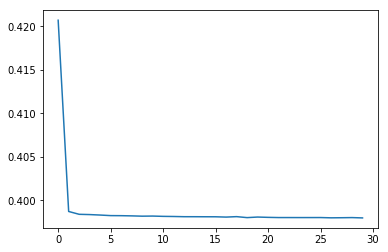

In [49]:
nn_model_mkt.save('cat_' + str(len(cat_labels)) +'_' + str(stk['stk_id'].max())+'stk_' + 
                  str(epochs) + 'eph_' + str(batch) + 'btch_'+ str(dropout) + 'drop_' + str(neurons) + 
                  'nrn_model__LOSS_'+ str(np.round(nn_history.history['loss'][-1],4)))

plt.plot(nn_history.history['loss'])


In [341]:
nn_model_mkt.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 64)                17664     
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 195       
_________________________________________________________________
activation_42 (Activation)   (None, 3)                 0         
Total params: 17,859
Trainable params: 17,859
Non-trainable params: 0
_________________________________________________________________


In [443]:
nn_model_mkt.layers[2].get_weights()[0]

64

In [464]:
y_cat_tr, y_pred_cat_tr = confusion_calc(X_train,y_train)
y_cat_ts, y_pred_cat_ts = confusion_calc(X_test,y_test)

In [44]:
y_cat_tr, y_pred_cat_tr = confusion_calc(X_big[:100000],Y_big[:100000],
                                         nn_model_mkt,intervals,cat_labels,thresholds=True)

In [43]:
sum(y_pred_cat_tr==6)

25140

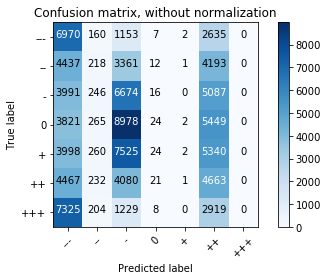

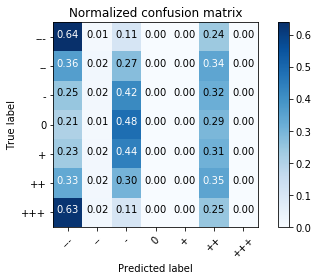

[0.1991, 0.20219999999999999]

In [45]:
# Plot non-normalized confusion matrix
cm_analysis(y_cat_tr, y_pred_cat_tr,class_names)

In [ ]:
cm_analysis(y_cat_ts, y_pred_cat_ts,class_names)

In [500]:

y_thresh=np.zeros(y_pred.shape)
thresh=np.percentile(y_pred, 67, axis=0, keepdims=True)
y_thresh=y_pred>[thresh[0]]*y_pred.shape[0]
y_pred1=y_thresh*1
y_pred_cat = y_pred1.argmax(axis=1)
y_cat=np.array(Y_big).argmax(axis=1)



Confusion matrix, without normalization
Normalized confusion matrix


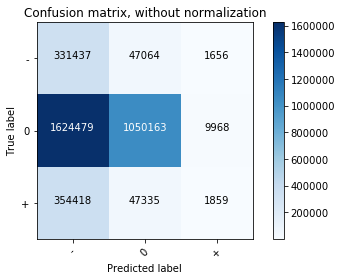

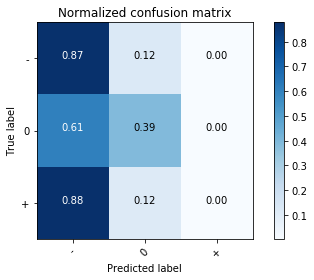

[0.14349999999999999, 0.13789999999999999]

In [502]:
cm_analysis(y_cat, y_pred_cat,thresh,class_names)

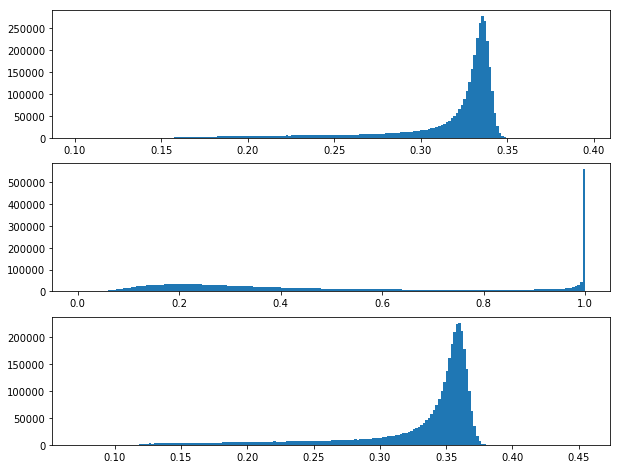

In [445]:
fig, ax = plt.subplots(3,1,figsize=(10, 8))
idx=0
for col in range(3):
    ax[idx].hist(y_pred[:,col],bins=200)
    idx+=1